<h1>Machine Learning Project on Pneumonia Detection with Python</h1>

<p>This project aims to develop a machine learning model that can accurately identify pneumonia in chest X-rays. We will use a combination of deep learning techniques and transfer learning to achieve this goal.</p>



In [12]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
from pathlib import Path
from fastai.vision.all import *


<h2>Importing the Dataset Setting up Paths</h2>

In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/chest-xray-pneumonia


In [14]:
path = Path("/kaggle/input/chest-xray-pneumonia")
import os

# List the contents of the directory
print(os.listdir(path/"chest_xray"))
print(os.listdir(path/"chest_xray"/"train"))

['chest_xray', '__MACOSX', 'val', 'test', 'train']
['PNEUMONIA', 'NORMAL']


<h2>Loading the Data for Training</h2>

In [15]:
dls = ImageDataLoaders.from_folder(
    path/"chest_xray/train",
    valid_pct=0.2,
    seed=42,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(size=224),
)

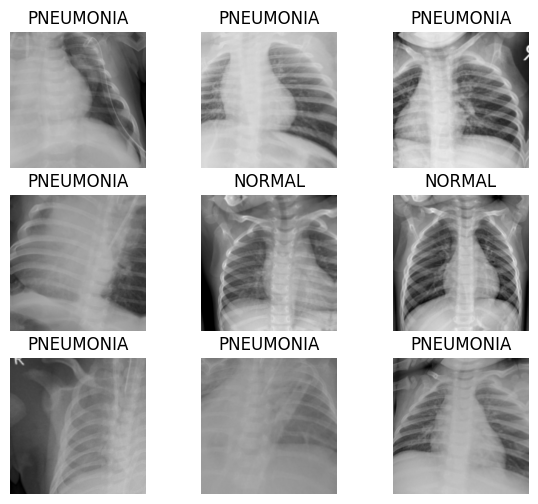

In [16]:
dls.show_batch(max_n=9, figsize=(7,6))

<h2>Using a ResNet50 Model for Transfer Learning</h2>

In [17]:
learn = cnn_learner(dls, resnet50, metrics=accuracy, model_dir="/content/models", n_out=dls.c)

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [ ]:
lr_finder = learn.lr_find()
lr_finder.plot(suggestions=True)

<h2>Training the Model</h2>

In [ ]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(4,slice(lr1,lr2))

lr = 1e-1
learn.fit_one_cycle(20,slice(lr))

learn.unfreeze()
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(10,slice(1e-4,1e-3))

learn.recorder.plot_losses()

<h2>Testing the Model</h2>

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# Use an image from the training dataset
img_path = get_image_files(path/"chest_xray/train")[0]
img = open_image(img_path)
print(learn.predict(img)[0])